# chapter 6: 비지도 학습

## 06 - 1 군집 알고리즘

한빛 마켓은 농산물 판매로 확대하며 새 이벤트를 기획하고 있습니다. 고객이 한빛 마켓에서 사고 싶은 과일 사진을 보내면 그중 가장 많이 요청하는 과일을 판매 품목으로 선정하려 합니다. 또 1위로 선정된 과일 사진을 보낸 고객 중 몇명을 뽑아 이벤트 당첨자로 선정할 겁니다. 그런데 고객이 올린 사진을 사람이 하나씩 분류하기는 어렵겠죠. 그렇다고 생선처럼 미리 과일 분류기를 훈련하기에는 고객들이 어떤 과일 사진을 보낼지 알 수 없으니 곤란함.  
사진에 대한 정답(타깃)을 알지 못하는데 어떻게 이 사진을 종류대로 모을 수 있을까요?

### 타깃을 모르는 비지도 학습
타깃이 없을 때 사용하는 머신러닝 알고리즘이 있음. __비지도 학습__ 이라고 함. 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습하는 거임. 혼공머신은 대체 어떻게 해야 할지 한참을 고민함. 그때 김 팀장이 흥미로운 아이디어를 제안.  
"사진의 픽셀값을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?"  
"글쎄요. 확신할 수는 없지만 해 봐야 알 것 같습니다."

### 과일 사진 데이터 준비하기
김 팀장이 준비한 과일 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진임. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 되어 있음. 넘파이에서 이 파일을 읽으려면 먼저 코랩으로 다운로드 해야됌.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy 파일을 로드하는 방법은 아주 간단함. load() 메서드에 파일 이름을 전달하는 것이 전부.

In [5]:
fruits = np.load('fruits_300.npy')

fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어 있는 모든 데이터를 담고 있음. fruits 배열의 크기를 확인.

In [6]:
print(fruits.shape)

(300, 100, 100)


이 배열의 첫 번재 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비. 이미지 크기는 100 x 100 입니다.  
각 픽셀은 넘파이 배열의 원소 하나에 대응함. 즉 배열의 크기가 100 x 100임.  
첫 번째 이미지의 첫번째 행을 출력하겠음. 3차원 배열이기 때문에, 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있음.

In [7]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력했음. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0 ~ 255까지의 정숫값을 가짐.  
이 정숫값에 대해 조금 더 설명하기 전에 먼저 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교하겠음.  
맷플롯립의 inshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있음. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정.

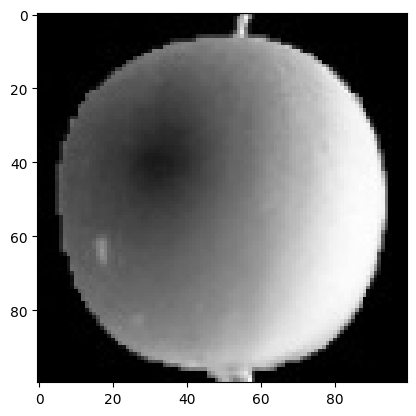

In [8]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

첫 번째 이미지는 사과와 같음. 그림처럼 행이 위에서 출력한 배열 값에 해당함.  
0에 가까울수록 검게 나타나고 높은 값은 밝게 표시됌.  
보통 흑백 샘플 이미지는 바탕이 밝고 물체가 짙은색임. 다음과 같은 사진이 저렇게 보이는 이유는 흑백이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것.  
사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색 (높은 값)으로 바꾸었음.  
왜 이렇게 바꾸었을까요? 우리의 관심 대상은 바탕이 아니라 사과임. 흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것입니다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만듬.  
우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용함. 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나오므로 보기에는 썩 좋지 않음.  
cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력함.

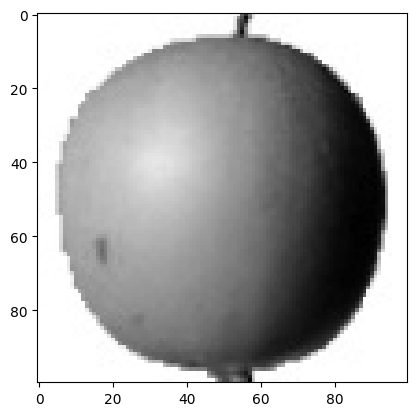

In [9]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이라는 것을 꼭 기억.  
이 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어있음. 바나나와 파인애플 이미지도 출력하겠음.

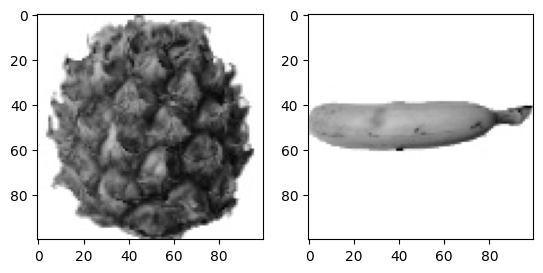

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

그림이 보기 좋게 나란히 나타남. 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있게 도와줌. subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정.  
여기에서는 subplots(1, 2)처럼 하나의 행과 2개의 열을 지정했음.  
반환된 axs는 2개의 서브 그래프를 담고 있는 배열. axs[0]에 파인애플 이미지를, 그리고 axs[1]에 바나나 이미지를 그렸음. 이 장에서 subplots()를 사용해 한 번에 여러 개의 이미지를 그려보겠음.  
자 이제 샘플 데이터가 준비되었음. 이 데이터의 처음 100개는 사과, 그 다음 100개는 파인애플, 마지막 100개는 바나나. 각 과일 사진의 평균을 내서 차이를 확인해봅시다.

### 픽셀값 분석하기
사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어 확인. 넘파이 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들겠음. 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리.  
fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용함. 그 다음 reshape() 메서드를 사용해 두 번째 차원(100)과 세 번째 차원 (100)을 10,000으로 합침.  
첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당함. 여기에서는 첫 번째 차원이 샘플 개수.

In [11]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

이제 apple, pineapple, banana 배열의 크기는 (100, 10000) 임. 사과를 확인해봅시다.

In [12]:
print(apple.shape)

(100, 10000)


이제 apple, pineapple, banana 배열에 들어 있는 샘플의 픽셀 평균값을 계산해봅시다. 이제 넘파이 mean() 메서드를 사용할 것임. 샘플마다 픽셀의 평균값을 계산해야 하므로 mean() 메서드가 평균을 계산할 축을 지정해야 함.  
axis=0으로 첫 번째 축인 행을 따라 계산함. axis=1로 지정하면 두 번째 축인 열을 따라 계산함.

##### 여기서 잠깐! axis 인수에 대해
axis는 배열 '축'을 의미. apple 2차원 배열에서 axis=1일 때는 열 방향으로 계산하고, axis=0일 때는 행 방향으로 계산함.  

우리가 필요한 것은 샘플의 평균값. 샘플은 모두 가로로 값을 나열했으니 axis=1로 지정하여 평균을 계산하겠음. (앞서 2차원 배열을 1차원 배열로 치환했기에 가능한 계산임.) 평균을 계산하는 넘파이 np.mean() 함수를 사용해도 되지만 넘파이 배열은  
이런 함수들을 메서드로도 제공함. 

In [13]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


사과 샘플 100개에 대한 픽셀 평균값을 계산했음. 히스토그램을 그려보면 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있음. (히스토그램은 값이 발생한 빈도를 그래프로 표시한 것.)  
보통 x축이 값의 구간(계급)이고, y축은 발생 빈도(도수)임.  
맷플롯립의 hist() 함수를 사용해 히스토그램을 그려봅시다. 사과, 파인애플, 바나나에 대한 히스토그램을 모두 겹쳐 그려보겠음.  
이렇게 하려면 조금 투명하게 해야 겹친 부분을 잘 볼 수 있음. alpha 매개변수를 1보다 작게 하면 투명도를 줄 수 있음. 또 맷플롯립의 legend() 함수를 사용해 어떤 과일의 히스토그램인지 범례를 만들어 봅시다.

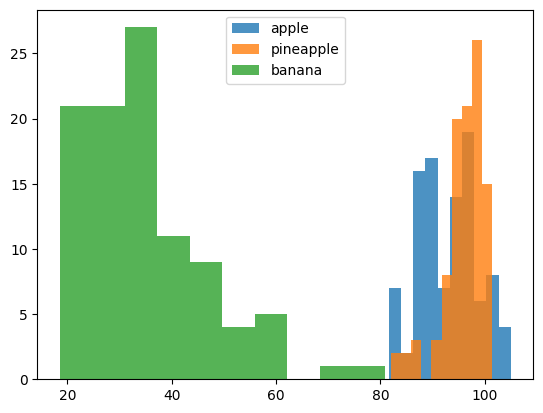

In [15]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

히스토그램을 보면 바나나 사진의 평균값은 40 아래에 집중되어 있음. 사과와 파인애플은 90 ~ 100 사이에 많이 모여 있음. 이 그림을 보면 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분됨.  
바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작음.  
반면 사과와 파인애플은 많이 겹쳐있음. 픽셀값만으로는 구분하기 쉽지 않음. 사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문.  
혼공머신은 골똘히 생각하다가 샘플의 평균값이 아니라 픽셀별 평균값을 비교해 보면 어떨까 생각했음. 전체 샘플에 대해 각 픽셀의 평균을 계산. 세 과일은 모양이 다르므로 픽셀값이 높은 위치가 조금 다를 것.  
픽셀의 평균을 계산하는 것도 간단함. axis=0으로 지정하면 됌. 이번에는 맷플롯립의 bar() 함수를 사용해 픽셀 10,000개에 대한 평균값을 막대그래프로 그려보겠음. subplots() 함수로 3개의 서브 그래프를 만들어 사과, 바나나, 파인애플에 대한 막대 그래프를 그려보겠음.

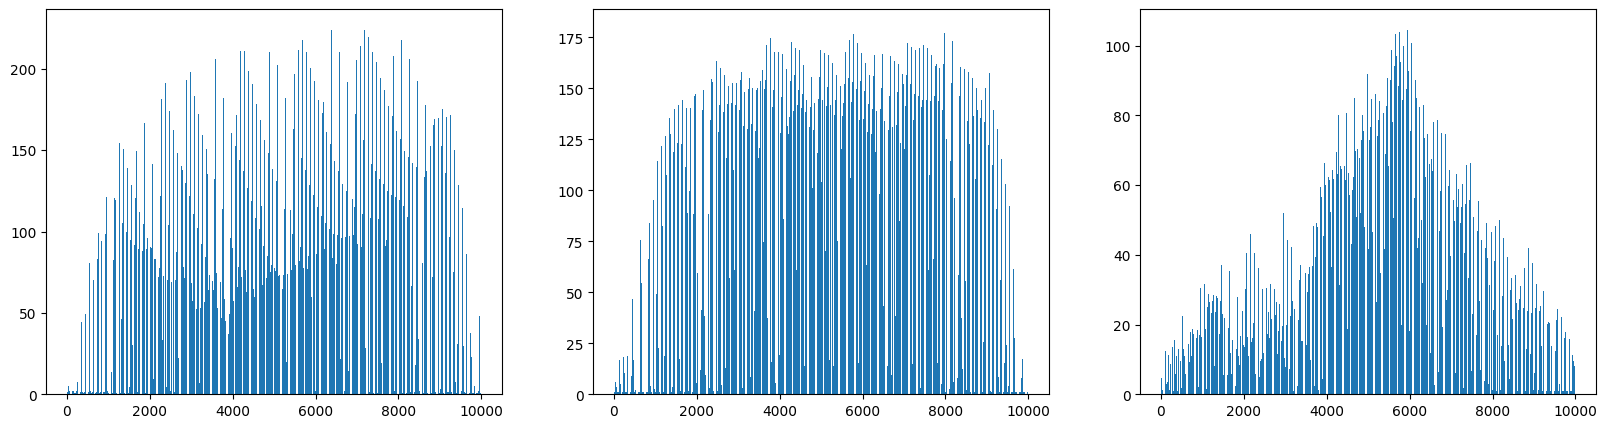

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

순서대로 사과, 파인애플, 바나나 그래프임. 3개의 그래프를 보면 과일마다 값이 높은 구간이 다름. 사과는 사진 아래쪽으로 갈수록 값이 높아지고, 파인애플 그래프는 비교적 고르면서 높음.  
바나나는 확실히 중앙의 픽셀값이 높음.  
픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋음.  
픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있음.

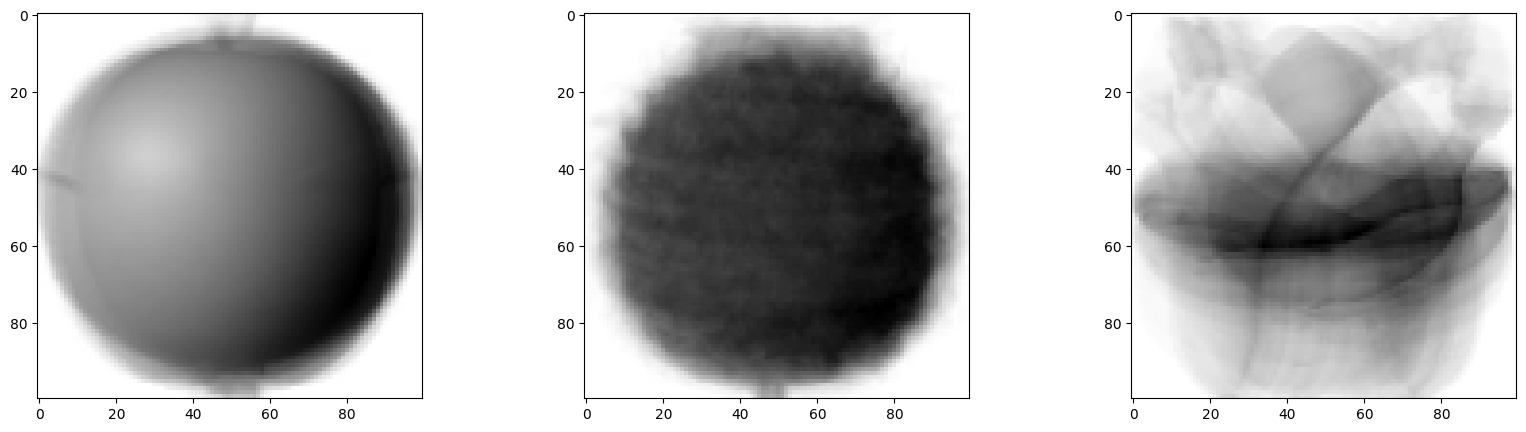

In [17]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

세 과일은 픽셀 위치에 따라 값의 크기가 차이가 남. 따라서 이 대표 이미지와 가까운 사진을 골라낸다면 사과, 파인애플, 바나나를 구분할 수 있지 않을까?

### 평균값과 가까운 사진 고르기
사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보죠. 3장에서 봤던 절댓값 오차를 사용하겠음.  
fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 됌.  
절댓값부터 계산해야겠음. 넘파이 abs() 함수는 절댓값을 계산하는 함수.  
배열을 입력하면 모든 원소의 절댓값을 계산하여 입력과 동일한 크기의 배열을 반환함.  
이 함수는 np.absolute() 함수의 다른 이름.  
다음 코드에서 abs_diff(300, 100, 100) 크기의 배열. 따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했음.  
이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열.

In [19]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


그 다음, 이 값이 가장 작은 순서대로 100개를 골라 보겠음. 즉 apple_mean과 오차가 가장 작은 샘플 100개를 고르는 샘. np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환함.  
이 인덱스 중에서 처음 100개를 선택해 10x10 격자로 이루어진 그래프를 그리겠음.

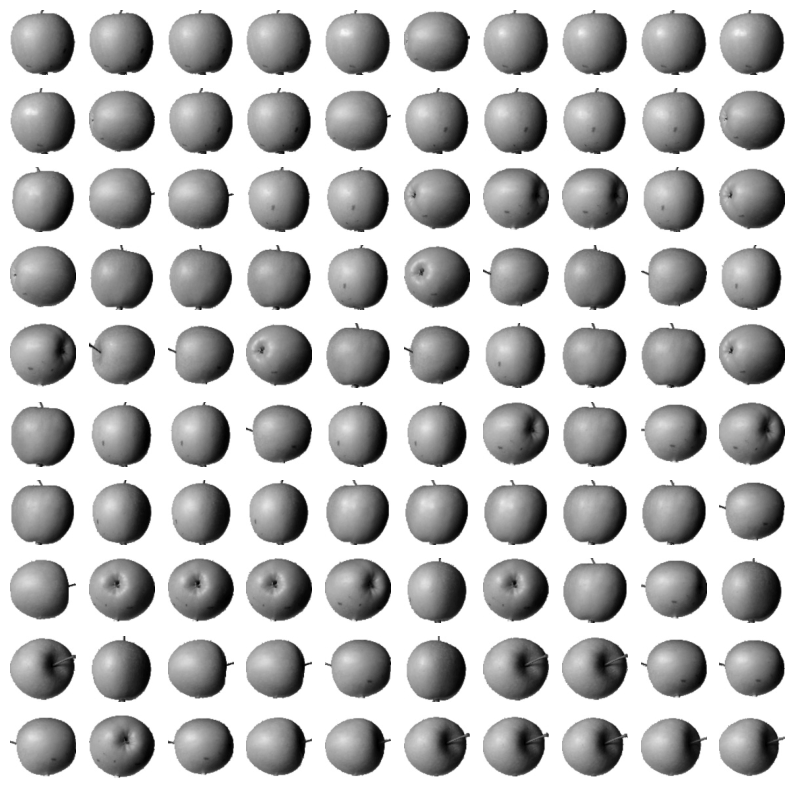

In [21]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize =(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

apple_mean과 가장 가까운 사진 100개를 골랐더니 모두 사과. 코드를 조금 더 자세히 설명하겠음.  
subplot() 함수로 10 x 10, 총 100개의 서브 그래프를 만듬. 그래프가 많기 때문에 전체 그래프의 크기를 figsize=(10,10)으로 조금 크게 지정했음.  
그다음 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지를 출력함. axs는 (10, 10) 크기의 2차원 배열이므로 i,j 두 첨자를 사용하여 서브 그래프 위치를 지정함.  
또 깔끔하게 이미지만 그리기 위해 axis('off')를 사용하여 좌표축을 그리지 않았음. 궁금하다면 'on'으로 값을 바꾸거나 해당 줄을 삭제하고 다시 그림을 그려보셈.  
흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해보았음. 이렇게 비슷한 샘플끼리 그룹을 모으는 작업을 __군집__ 이라고 함. 군집은 대표적인 비지도 학습 작업 중 하나임.  
군집 알고리즘에서 만든 그룹을 __클러스터__ 라고 부름.  
하지만 우리는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었음. 즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었음.  
실제 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없음.  
타깃값을 모르면서 어떻게 세 과일의 평균값을 찾을 수 있음. 다음 절에서 배움.

## 06 - 2 k-평균

1절에서 사과, 파인애플, 바나나에 있는 각 픽셀의 평균값을 구해서 가장 가까운 사진을 골랐음. 이 경우에는 사과, 파인애플, 바나나 사진임을 미리 알고 있었기 때문에 각 과일의 평균을 구할 수 있었음.  
하지만 진짜 비지도 학습에서는 사진에 어떤 과일이 들어 있는지 알지 못함.  
이러한 경우 어떻게 평균값을 구할 수 있을까? 바로 __K-평균__ 군집 알고리즘이 평균값을 자동으로 찾아줌. 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심 또는 센트로이드라고 부름.  
이번 절에서 k-평균 알고리즘의 작동 방식을 이해하고 사과, 파인애플, 바나나를 구분하는 비지도 학습 모델을 만들어 보겠음.  


### k-평균 알고리즘 소개
k-평균 알고리즘 작동 방식은 다음과 같음.  
1. 무작위로 k개의 클러스터 중심을 정함.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플을 지정함.  
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경함.  
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복함.  

위의 말을 풀어써보면, 먼저 3개의 클러스터 중심(빨간점)을 랜덤하게 지정. 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶음. (클러스터에는 순서나 번호는 의미가 없음.)  
그 다음 클러스터의 중심을 다시 계산하여 이동시킴. 맨 아래 클러스터는 사과 쪽으로 중심이 조금 더 이동하고 왼쪽 위의 클러스터는 바나나 쪽으로 중심이 더 이동하는 식.  
클러스터 중심을 다시 계산한 다음 가장 가까운 샘프을 다시 클러스터로 묶음. 이동된 클러스터 중심에서 다시 한번 가장 가까운 샘플을 클러스터로 묶음. 중심에서 가장 가까운 샘플은 이전 클러스터와 동일.

### kMeans 클래스
1절에서 사용했던 데이터 셋을 여기에서도 사용.

그다음 넘파이 np.load() 함수를 사용해 npy 파일을 읽어 넘파이 배열을 준비. k-평균 모델을 훈련하기 위해 (샘플 개수, 너비, 높이) 크기의 3차원 배열을 (샘플 개수, 너비 x 높이) 크기를 가진 2차원 배열로 변경.

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

사이킷런의 k-평균 알고리즘은 sklearn.cluster 모듈 아래 kMeans 클래스에 구현되어 있음. 이 클래스에서 설정할 매개변수는 클러스터 개수를 지정하는 n_clusters.  
여기에서는 클러스터 개수를 3으로 지정. 이 클래스를 사용하는 방법도 다른 클래스와 비슷함. 다만 비지도 학습이므로, fit() 메서드에서 타깃 데이터를 사용하지 않음.

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=42)
km.fit(fruits_2d)

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장됌. labels_ 배열의 길이는 샘플 개수와 같음. 이 배열은 각 샘플이 어떤 레이블에 해당되는지를 나타냄. n_clusters=3으로 지정했기 때문에 labels_ 배열의 값은 0, 1, 2 중 하나.

In [3]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


레이블 값 0, 1, 2와 레이블 순서에는 어떤 의미도 없음. 실제 레이블 0, 1, 2가 어떤 과일 사진을 주로 모았는지 알아보려면 직접 이미지를 출력하는 것이 최선.

In [4]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


첫 번째 클러스터 (레이블 0)가 111개의 샘플을 모았고, 두 번째 클러스터 (레이블 1)가 98개의 샘플을 모았음.  
세 번째 클러스터 (레이블 2)는 91개의 샘플을 모음. 그럼 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력하기 위해 간단한 유틸리팉 함수 draw_fruits()를 만들어 보겠음.

In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수.
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산함.
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그림.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits() 함수는 (샘플 개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력함. 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정함. figsize는 ratio 매개변수에 비례하여 커짐.  
ratio의 기본값은 1. 
그다음 2중 for 반복문을 사용하여 먼저 첫 번째 행을 따라 이미지를 그림. 그리고 두 번째 행의 이미지를 그리는 식으로 계속 됌.  
이 함수를 사용해 레이블이 0인 과일 사진을 모두 그려보겠음. km.labes_==2과 같이 쓰면 km.labels_ 배열에서 값이 2인 위치는 True, 그 외는 모두 False가 됨.  
넘파이는 이런 불리언 배열을 사용해 원소를 선택할 수 있음. __불리언 인덱싱__ 이라고 함.  
넘파이 배열에 불리언 인덱싱을 적용하면 True인 위치의 원소만 모두 추출.

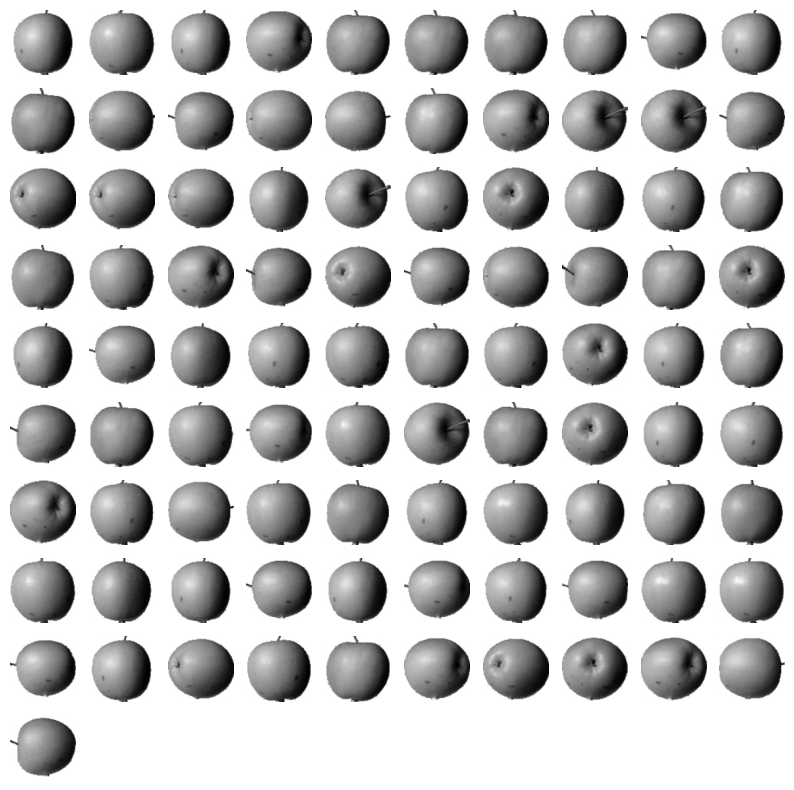

In [9]:
draw_fruits(fruits[km.labels_==2])

레이블 2로 클러스터링 된 91개의 이미지를 모두 출력했음. 이 클러스터는 모두 사과가 올바르게 모였음.

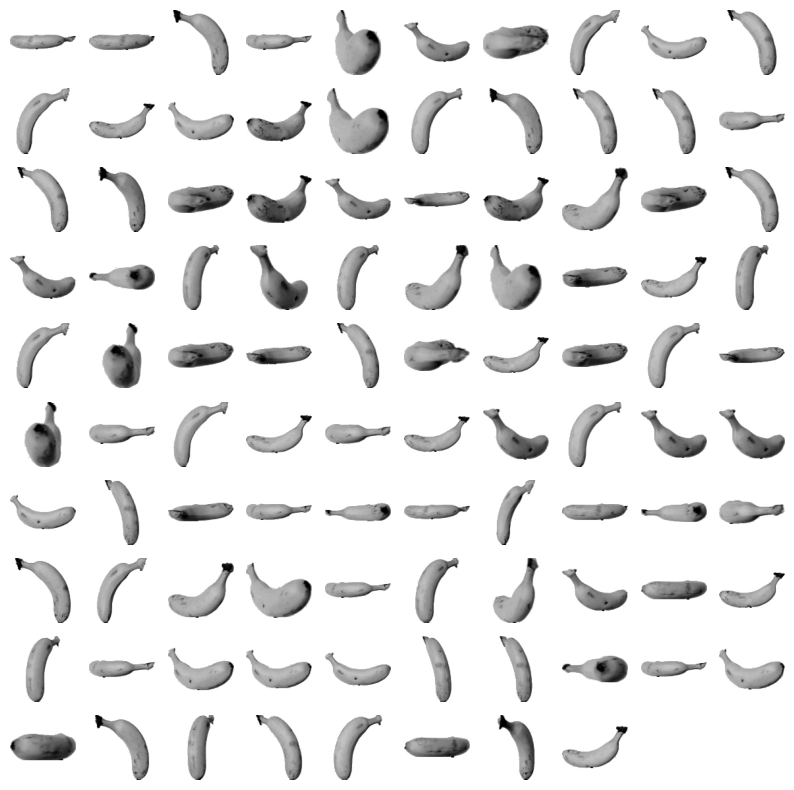

In [13]:
draw_fruits(fruits[km.labels_==1])

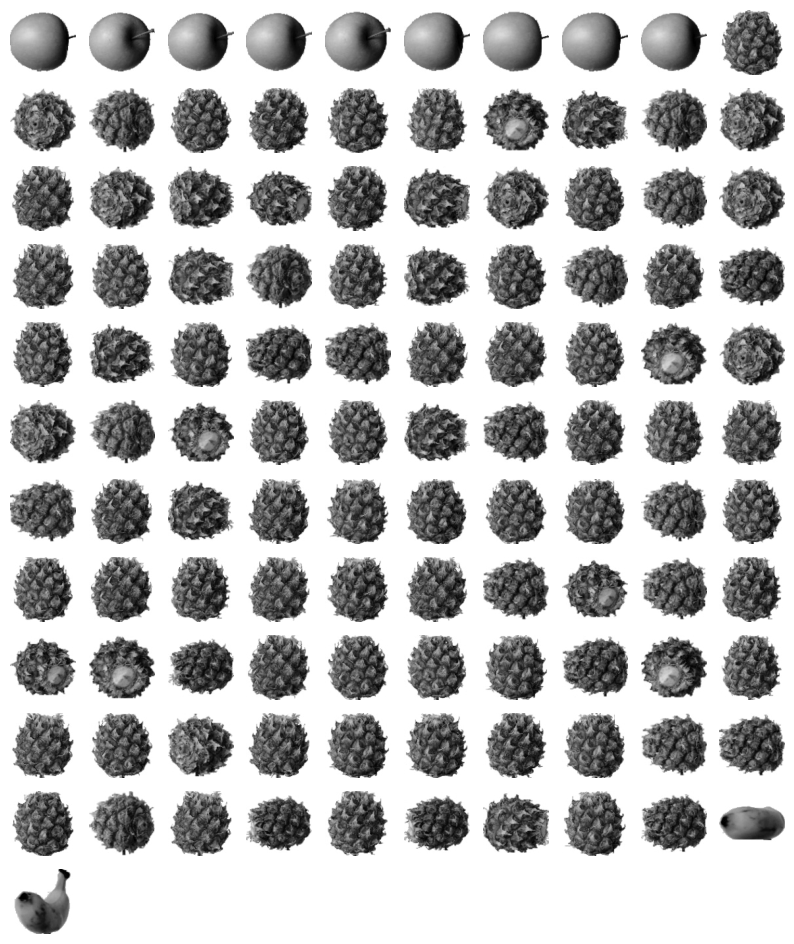

In [15]:
draw_fruits(fruits[km.labels_==0])

레이블이 1인 클러스터는 바나나로만 이루어져 있음. 하지만 레이블이 0인 클러스터는 파인애플에 사과 9개와 바나나 2개가 섞여있음. k-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했음.  
하지만 훈련 데이터에 타깃 레비을을 전혀 제공하지 않았음에도 스스로 비슷한 샘플들을 아주 잘 모은 것 같음.

### 클러스터 중심
KMeans 클래스가 최종적으로 찾은 클러스터 중심은 clusster_centers_ 속성에 저장되어 있음.  
이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력하려면 100x100 크기의 2차원 배열로 바꿔야 함.

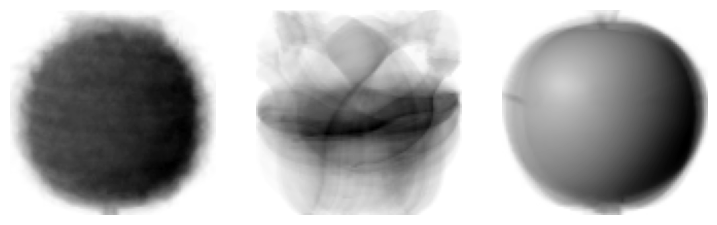

In [16]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

이전 절에서 사과, 바나나, 파인애플의 픽셀 평균값을 출력했던 것과 매우 비슷함.  
KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform() 메서드를 가지고 있음. transform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성 값을 변환하는 도구로 사용할 수 있다는 의미.  
인덱스가 100인 샘플에 transform() 메서드를 적용해봅시다. fit() 메서드와 마찬가지로 2차원 배열을 기대함. fruits_2d[100]처럼 쓰면 (10000,) 크기의 배열이 되므로 에러가 발생함.  
슬라이싱 연산자를 사용해서 (1, 10000) 크기의 배열을 전달하겠음.

In [17]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


하나의 샘플을 전달했기 때문에 반환된 배열은 크기가 (1, 클러스터 개수)인 2차원 배열. 첫 번째 클러스터(레이블 2), 두 번째 클러스터(레이블 1)가 각각 첫번재 원소, 두번째 원소의 값.  
첫 번째 클러스터까지의 거리가 3393.8로 가장 작음. 이 샘플은 레이블 0에 속한 것 같음.  
KMeans 클래스는 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공함.

In [18]:
print(km.predict(fruits_2d[100:101]))

[0]


transform()의 결과에서 짐작할 수 있듯이 레이블 0로 예측했음. 클러스터 중심을 그려보았을 때, 레이블 0은 파인애플이었으므로 이 샘플은 파인애플이겠군요. 확인 

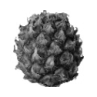

In [19]:
draw_fruits(fruits[100:101])

k-평균 알고리즘은 앞에서 설명했듯이 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾음.  
알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_ 속성에 저장됨.

In [ ]:
print(km.n_iter_)

4


클러스터 중심을 특성 공학처럼 사용해 데이터셋을 저차원 (이 경우에는 10000에서 3으로 줄입니다.)으로 변환할 수 있습니다. 또는 가장 가까운 거리에 있는 클러스터 중심을 샘플의 예측값으로 사용할 수 있다는 것을 배웠음.  
이번에 우리는 타깃값을 사용하진 않았지만, 약간의 편법을 사용했음. n_clusters를 3으로 지정한 것은 타깃에 대한 정보를 활용한 셈. 실전에서는 클러스터 개수조차 알 수 없음.  
n_clusters를 어떻게 지정해야 하나?

### 최적의 k 찾기
k-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것. 실전에서는 몇 개의 클러스터가 있는지 알 수 없음.  
사실 군집 알고리즘에서 적절한 k 값을 찾기 위한 완벽한 방법은 없음. 몇 가지 도구가 있지만 저마다 장단점이 있음.  
여기서는 적절한 클러스터 개수를 찾기 위한 대표적인 방법인 __엘보우__ 방법에 대해 알아보겠음.  
앞에서 본 것처럼 k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있음. 이 거리의 제곱 합을 __이너셔__ 라고 부름.  
이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 생각할 수 있음. 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듬.  
엘보우 방법은 클러스터 개수를 늘려가면서 이너셔도 줄어듬. 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법.  
클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도 꺾이는 지점이 있음. 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않음.  
즉, 이너셔가 크게 줄어들지 않음.

과일 데이터셋을 사용해 이너셔를 계산해 보죠. 친절하게도 KMeans 클래스는 자동으로 이너셔를 계산해서 inertia_ 속성으로 제공함. 다음 코드에서 클러스터 개수 k를 2 ~ 6까지 바꿔가며 KMeans 클래스를 5번 훈련함.  
fit() 메서드로 모델을 훈련한 후 inertia_ 속성에 저장된 이너셔값을 inertia 리스트에 추가함. 마지막으로 inertia 리스트에 저장된 값을 그래프에 출력함.

/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

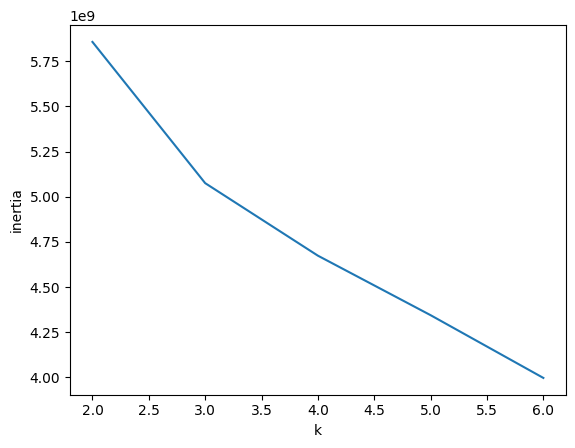

In [21]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

이 그래프에서는 꺾이는 지점이 뚜렷하지는 않지만, k=3에서 그래프의 기울기가 조금 바뀐 것을 볼 수 있음. 엘보우 지점보다 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 군집 효과도 줄어듬. 하지만 이 그래프에서는 이런 지점이 명확하지 않음.

## 06 - 3 주성분 분석
한빛 마켓의 과일 사진 이벤트도 대성공. 매일 각양각색의 과일 사진이 업로드되고 있음. k-평균 알고리즘으로 업로드 된 사진을 클러스터로 분류하여 폴더별로 저장.  
그런데 이벤트가 진행되면서 문제가 생김. 너무 많은 사진이 등록되어 저장공간이 부족함. 나중에 군집이나 분류에 영향을 끼치지 않으면서 업로드 된 사진의 용량을 줄일 수 있을까?  
"업로드된 사진이 너무 많아서 디스크 공간이 부족, 사진을 좀 압축할 수 없나?"
"머신러닝 교육때 받은 차원축소 이용"

### 차원과 차원 축소
지금까지 우리는 데이터가 가진 속성을 특성이라고 불렀음. 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈. 머신러닝에서는 이런 특성을 __차원__ 이라고 부름.  
10,000개의 특성은 결국 10,000개의 차원이라는 것. 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것.  
이를 위해 비지도 학습 작업 중 하나인 __차원 축소__ 알고리즘을 다루어 볼 것임. 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 3장에서 배웟음.  
차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법임.  
또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음. 대표적인 차원 축소 알고리즘인 __주성분 분석__ 또는 __PCA__ 라고 불리는 것을 배울 예정.

### 주성분 분석 소개
주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있음. 분산은 데이터가 널리 퍼져있는 정도를 의미. 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각 할 수 있음.  
주성분 벡터는 원본 데이터에 있는 어떤 방향. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음.  
예를 들면 샘플 데이터 s(4, 2)를 주성분에 직각으로 투영하면 1차원 데이터 p(4, 5)를 만들 수 있음.  
주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다는 점을 기억. 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것임. 첫 번째 주성분을 찾은 다음 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾음. 이 벡터가 두 번째 주성분. 여기서는 2차원을 예로 하였기에, 주성분의 방향은 하나 뿐.  
일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음.

### PCA 클래스
과일 사진 데이터를 다운로드하여 넘파이 배열로 적재.

In [22]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공함. PCA 클래스의 객체를 만들 때, n_components 매개변수에 주성분의 개수를 지정.  
k-평균과 마찬가지로 비지도 학습이기 때문에 fit() 메서드에 타깃값을 제공하지 않음.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있음. 배열의 크기 확인

In [24]:
print(pca.components_.shape)

(50, 10000)


n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50. 즉, 50개의 주성분을 찾은 것임. 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000.  
원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있음. draw_fruits() 함수를 사용해 주성분을 그림으로 그려봅시다.

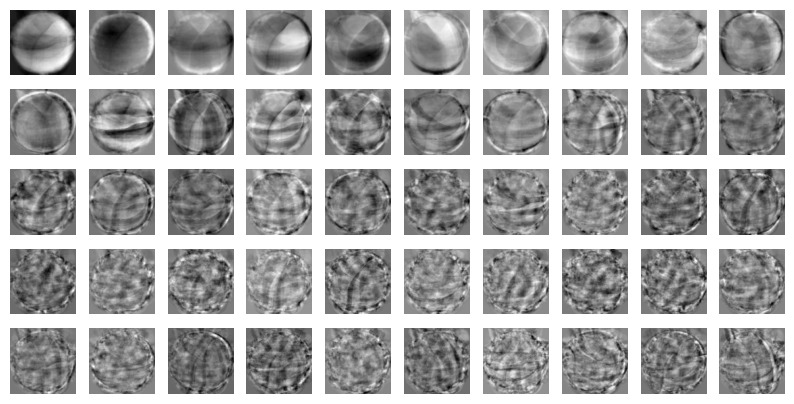

In [26]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것. 한편으로는 데이터 셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수 있음.  
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음. 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있음.  
PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여봅시다.

In [27]:
print(fruits_2d.shape)

(300, 10000)


In [28]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


fruits_2d는 (100, 10000) 크기의 배열. 10,000개의 픽셀(특성)을 가진 300개의 이미지. 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환.  
이제 fruits_pca 배열은 50개의 특성을 가진 데이터.  
데이터를 무려 1/200로 줄어들었음. 데이터 차원을 줄였을 때, 다시 원상 복구도 가능할까?

### 원본 데이터 재구성
앞에서 10,000개의 특성을 50개로 줄였음. 이로 인해 어느정도 손실이 발생함. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있음.  
PCA 클래스는 inverse_transform() 메서드를 제공함. 앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원.

In [30]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


예상대로 10,000개의 특성이 복원됨. 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력하겠음.

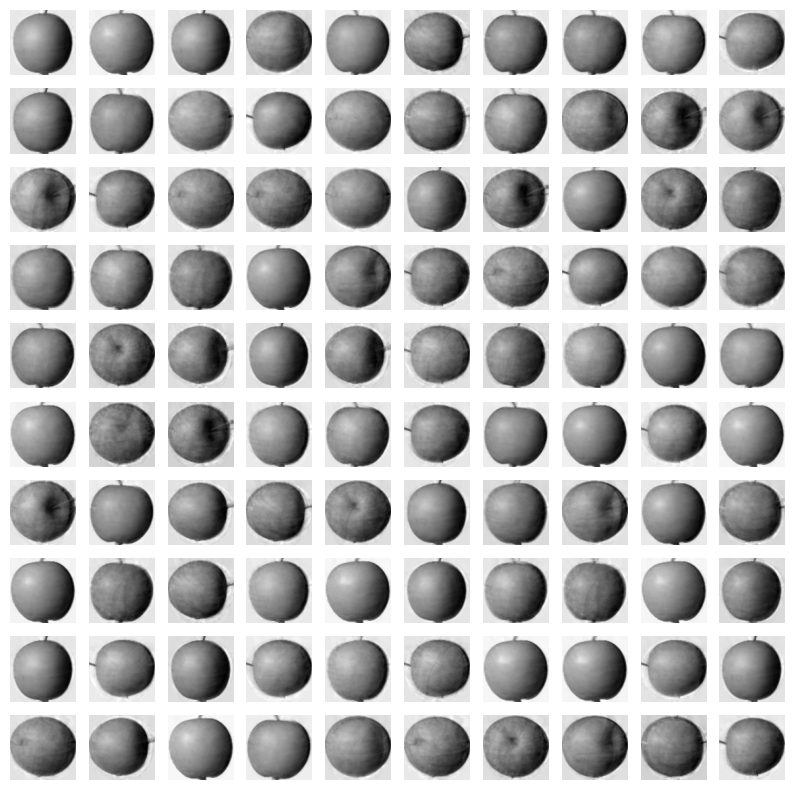

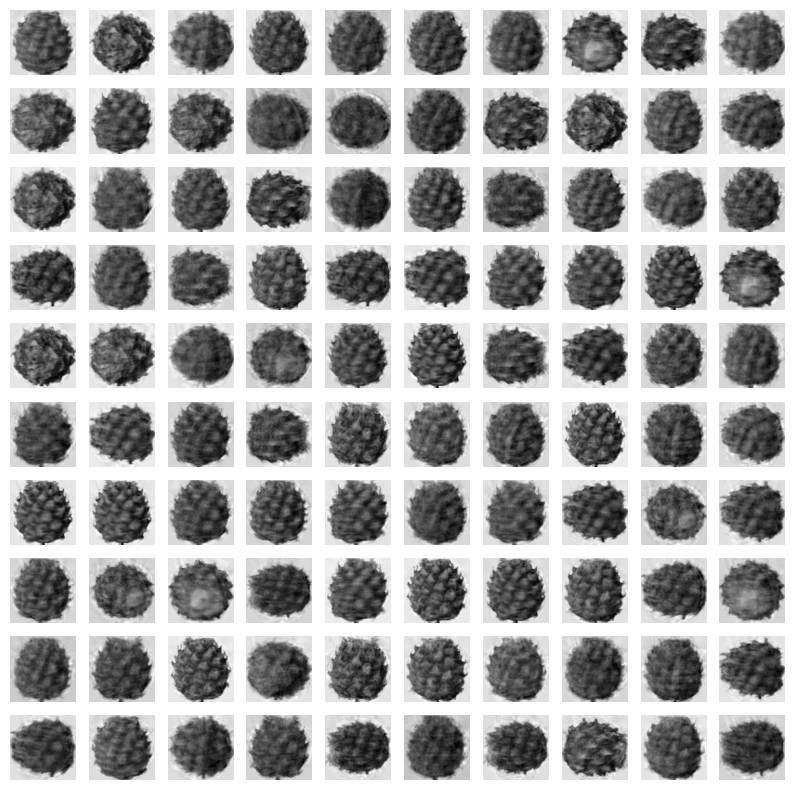

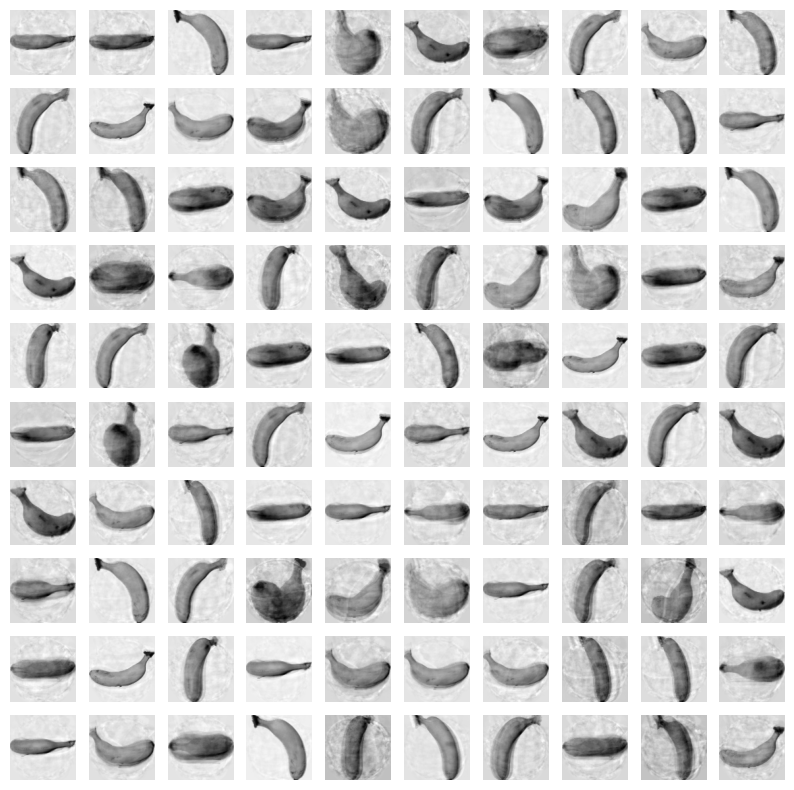

In [31]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

거의 모든 과일이 잘 복원 되었음. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10,000개로 늘린것을 감안하면 놀라운 일임.  
50개의 특성은 얼마나 분산을 보존하고 있는 것인지 확인.

### 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 __설명된 분산__ 이라고 함. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음.  
당연히 첫 번째 주성분의 설명된 분산이 가장 큼. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음.

In [32]:
print(np.sum(pca.explained_variance_ratio_))

0.921482780492913


92%가 넘는 분산을 유지하고 있음. 설명된 분산의 비율을 그래프로 그려보면, 적절한 주성분의 개수를 찾는 데 도움이 됌.

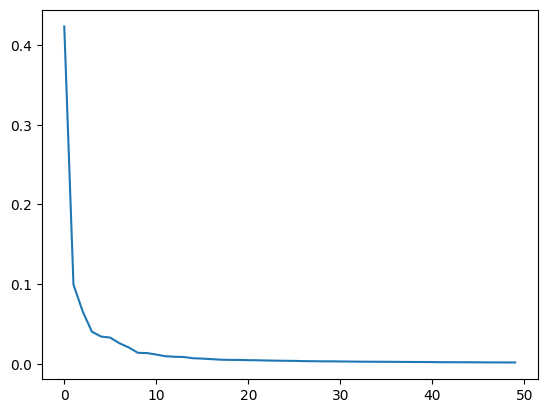

In [33]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현하고 있음. 그 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음. 이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련하겠음. 원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인.

### 다른 알고리즘과 함께 사용하기
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 확인.  
3개의 과일 사진을 분류해야 하므로, 간단한 로지스틱 회귀 모델을 사용. 먼저, 사이킷런의 LogisticRegression 모델을 만듬.

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

지도 학습 모델을 사용하려면 타깃값이 있어야 함. 여기에서는 사과를 0, 파인애플을 1, 바나나를 2로 지정.  
파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복.  
이를 이용하면 100개의 0, 100개의 1, 100개의 2로 이루어진 타깃 데이터를 손쉽게 만들 수 있음.

In [35]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

먼저 원본 데이터인 fruits_2d를 사용해 봅시다. 로지스틱 회귀 모델에서 성능을 가늠해 보기 위해 cross_validate()로 교차 검증을 수행.

In [36]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6689739227294922


교차 검증의 점수는 0.997로 매우 높음. 특성이 10,000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉬움. cross_validate() 함수가 반환하는 딕셔너리에는  
fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음.

In [37]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.00705108642578125


50개의 특성만 사용했는데도 정확도가 100%이고 훈련시간이 0.03초로 20배 이상 감소.  
PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음.  
앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했음.  
이 대신 원하는 설명된 분산의 비율을 입력할 수도 있음. PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음.  
설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보겠음.

In [38]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

몇개의 주성분을 찾았는지 확인

In [39]:
print(pca.n_components_)

2


2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.  
이 모델로 원본 데이터를 변환하겠음. 주성분이 2개 이므로 변환된 데이터의 크기는 (300, 2)가 될 것임.

In [40]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [41]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.010666656494140624


/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성함.  
이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보겟음.

In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/Users/seunghalee/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


fruits_pca로 찾은 클러스터는 각각 91개, 99개, 110개의 샘플을 포함하고 있음. 

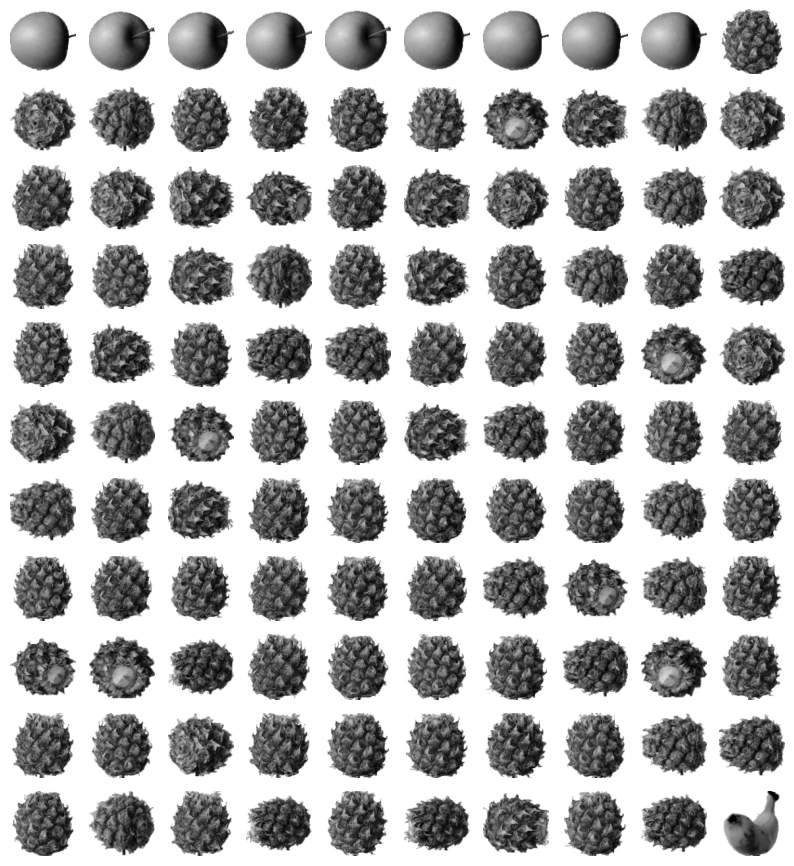

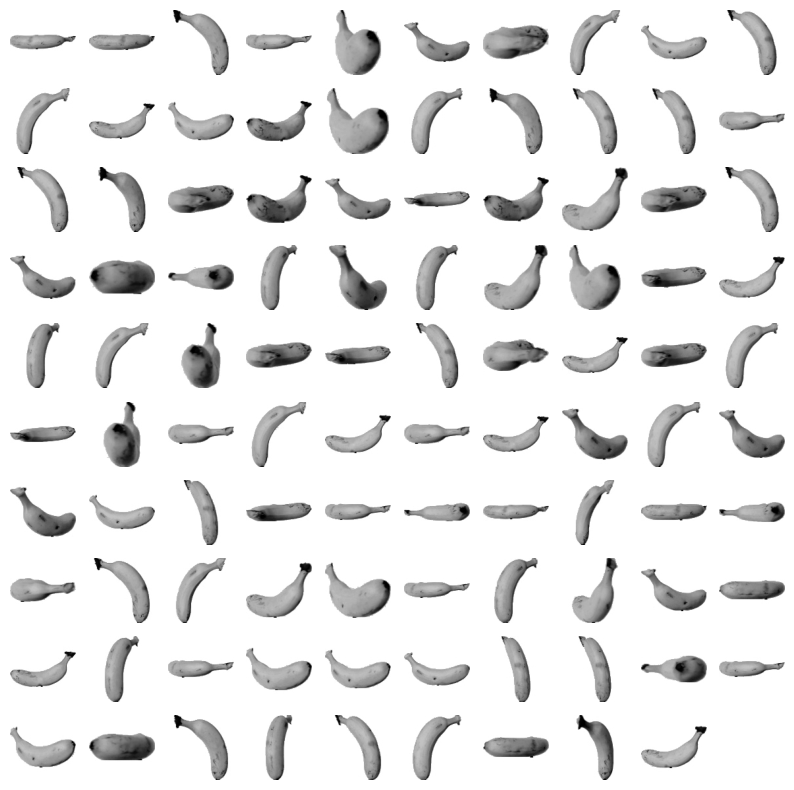

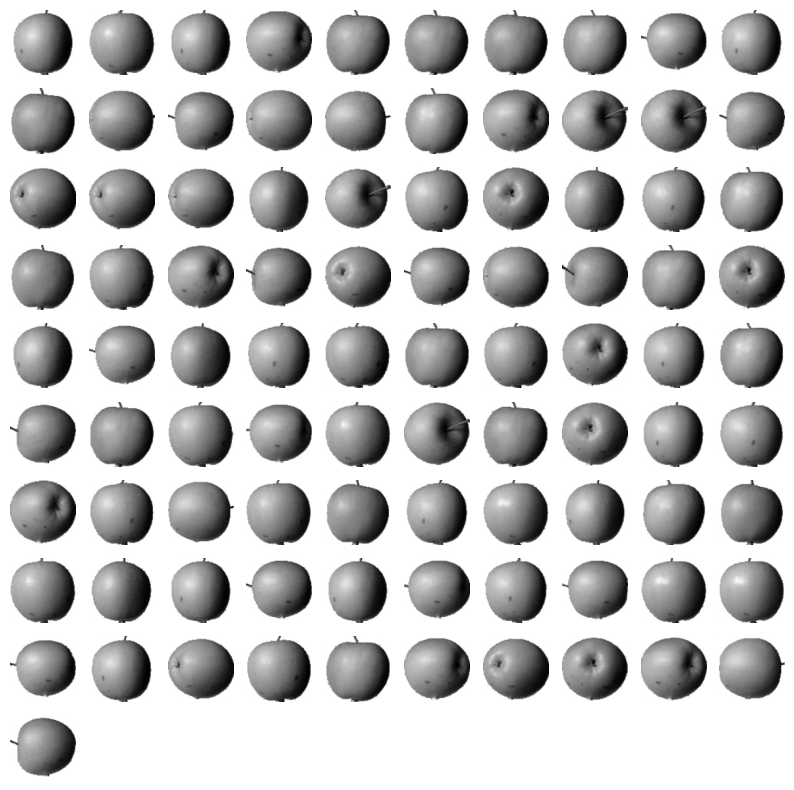

In [43]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_== label])
    print("\n")

2절에서 찾은 클러스터와 비슷하게 파인애플은 사과와 조금 혼동되는 면이 있음.  
훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화. 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움. fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현할 수 있음. 앞에서 찾은 km.labes_를 사용해 클러스터별로 나누어 산점도를 그려보겠음.

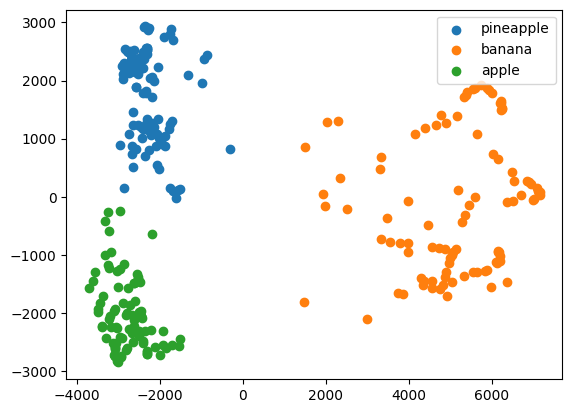

In [45]:
for label in range(0, 3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분됌. 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유를 이제 알 것 같음.  
이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어있음. 이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬울 것 같음. 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있음.